In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 4)
# !date

# %load_ext autoreload
# %autoreload 2

# Predicting a continuous outcome from text


## 0. Data Prep

In [ ]:
# start with a corpus of text, relevant to global health metrics
# described here: https://gatesopenresearch.org/articles/2-18/v1

df = pd.read_excel('https://osf.io/w87ym/download', sheet_name='data')
df

In [ ]:
# text data (feature vector)
X_text = df.open_response.astype(str)

In [5]:
# age in years as continuous outcome to predict
y = df.age_years.fillna(df.age_months/12.0).fillna(df.age_days/365.25)

In [6]:
df[y>100].age_years.value_counts()

999.0    118
102.0      1
Name: age_years, dtype: int64

In [7]:
# drop rows without an age, or with age more than 100 or less than 0
bad_data_rows = (y.isnull() | (y == 999))
y = y[~bad_data_rows]
X_text = X_text[~bad_data_rows]

In [8]:
# convert to numpy arrays (pandas and sklearn don't always work together well)
y = y.values
X_text = X_text.values

In [9]:
X_text[:2]

array(['no comments.[PERSON] only told us what happened to the deceased during the month that he lived with her. she does not know the answer to some questions because the deceased was taken to the hospital by ambulance, and it was her husband who went to the hospital (for only one day). the lady says the deceased had cirrhosis and that was the cause of his death.',
       '[PATIENT] was suffering for the last two years with wheezing, joint pains, lung obstruction decease, mental agony, depression, fits and heart problems. all these deceases come and go often.\r\n fits came before his death. then onwards he started loosing consciousness. there was pain in the chest and fever. treatment is given at [DOCTOR]. ( [HOSPITAL], [PLACE]). he referred to [HOSPITAL2]. but they have not taken the case, and advised us to go to fever hospital. at fever hospital, they referred to the [HOSPITAL3]. we have gone by 108 to [HOSPITAL3]. he died after two hours of treatment.'],
      dtype=object)

In [3]:
# instead of encoding the text data with an n-gram, in this notebook we will use doc2vec to embed the
# text in a high-dimensional vector

# see https://radimrehurek.com/gensim/models/doc2vec.html for documentation

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import word2vec

In [5]:
print(word2vec.FAST_VERSION)

1


  Could not find a version that satisfies the requirement libpython (from versions: )
No matching distribution found for libpython


In [3]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_text)]

NameError: name 'X_text' is not defined

In [44]:
%%time
model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)

CPU times: user 24.9 s, sys: 2.85 s, total: 27.7 s
Wall time: 12.9 s


In [45]:
vector = model.infer_vector([X_text[0]])
vector

array([ 4.7540697e-03,  5.6939959e-03, -5.3986213e-03,  6.4885179e-03,
       -9.9563431e-03, -6.1436804e-05,  9.9745682e-03, -4.9145520e-03,
       -5.7798391e-03, -7.5881304e-03,  2.3643777e-03,  4.2137745e-04,
       -1.9270923e-03, -2.4307834e-03,  2.4967561e-03,  3.1249523e-03,
        6.6665793e-03, -3.6110103e-03, -5.5678841e-03, -1.3822837e-03,
       -3.5947775e-03, -3.1611675e-03, -7.3093916e-03,  5.8761137e-03,
        9.4178291e-03, -1.2074431e-03, -2.1537917e-03, -3.6551692e-03,
        3.3709705e-03,  3.7375726e-03,  6.8852436e-03,  2.6244388e-03,
        6.0572177e-03,  6.6508609e-03,  4.3719271e-03, -5.0327377e-03,
        6.2206974e-03, -4.3365788e-03,  8.0949633e-04,  9.7979419e-03,
       -5.9020254e-03,  7.0130979e-03, -7.4302536e-03, -8.9368559e-03,
       -3.8574499e-03, -9.7366620e-04, -3.5616411e-03,  7.2801379e-03,
       -4.4167475e-03,  5.4005207e-03], dtype=float32)

In [46]:
%%time
X = np.array([model.infer_vector([x_i]) for x_i in X_text])

CPU times: user 2.07 s, sys: 0 ns, total: 2.07 s
Wall time: 2.06 s


In [47]:
X[0]

array([ 4.7540697e-03,  5.6939959e-03, -5.3986213e-03,  6.4885179e-03,
       -9.9563431e-03, -6.1436804e-05,  9.9745682e-03, -4.9145520e-03,
       -5.7798391e-03, -7.5881304e-03,  2.3643777e-03,  4.2137745e-04,
       -1.9270923e-03, -2.4307834e-03,  2.4967561e-03,  3.1249523e-03,
        6.6665793e-03, -3.6110103e-03, -5.5678841e-03, -1.3822837e-03,
       -3.5947775e-03, -3.1611675e-03, -7.3093916e-03,  5.8761137e-03,
        9.4178291e-03, -1.2074431e-03, -2.1537917e-03, -3.6551692e-03,
        3.3709705e-03,  3.7375726e-03,  6.8852436e-03,  2.6244388e-03,
        6.0572177e-03,  6.6508609e-03,  4.3719271e-03, -5.0327377e-03,
        6.2206974e-03, -4.3365788e-03,  8.0949633e-04,  9.7979419e-03,
       -5.9020254e-03,  7.0130979e-03, -7.4302536e-03, -8.9368559e-03,
       -3.8574499e-03, -9.7366620e-04, -3.5616411e-03,  7.2801379e-03,
       -4.4167475e-03,  5.4005207e-03], dtype=float32)

In [48]:
# make a train/test split for out-of-sample validation

import sklearn.model_selection
train, test = sklearn.model_selection.train_test_split(range(len(y)))

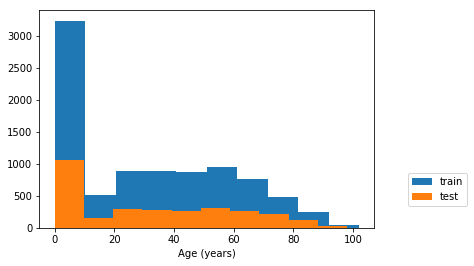

In [49]:
plt.hist(y[train], label='train')
plt.hist(y[test], label='test')
plt.xlabel('Age (years)')
plt.legend(loc=(1.1, .1));

## 1. Penalized Linear Regression in `sklearn`

In [50]:
import sklearn.linear_model
n_jobs = 32

# clf = sklearn.linear_model.ElasticNetCV(n_jobs=n_jobs)
clf = sklearn.linear_model.Lasso()
%time clf.fit(X[train], y[train])

CPU times: user 18 ms, sys: 0 ns, total: 18 ms
Wall time: 14.4 ms


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
%time ypred = clf.predict(X[test])

CPU times: user 7 ms, sys: 13 ms, total: 20 ms
Wall time: 2.18 ms


In [52]:
# ypred = np.ones_like(y[test]) * 25

### Now the betas are not related to specific words

In [56]:
pd.Series(clf.coef_*1_000).sort_values()


0     0.0
27   -0.0
28   -0.0
29    0.0
     ... 
21    0.0
22   -0.0
12    0.0
49   -0.0
Length: 50, dtype: float32

In [57]:
# bad thing is it doesn't predict that well

In [58]:
# OOS RMSE (accuracy)
np.sqrt(np.mean((ypred - y[test])**2))

27.68416524933234

In [59]:
y[test]

array([1.70000000e+01, 2.19028063e-02, 2.70000000e+01, ...,
       6.50000000e+01, 2.70000000e+01, 3.50000000e+01])

In [60]:
ypred

array([30.802176, 30.802176, 30.802176, ..., 30.802176, 30.802176,
       30.802176], dtype=float32)

In [61]:
np.sqrt(np.mean((25 - y[test])**2))

28.327315345543877

## 2. `GBM` from `sklearn`

In [62]:
def fit_predict(clf):
    print('fitting', clf)
    %time clf.fit(X[train], y[train])
    print('predicting')
    ypred = clf.predict(X[test])
    print('RMSE accuracy:', np.sqrt(np.mean((ypred - y[test])**2)))

In [63]:
import sklearn.ensemble
clf = sklearn.ensemble.GradientBoostingRegressor()
fit_predict(clf)

fitting GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
CPU times: user 7.46 s, sys: 0 ns, total: 7.46 s
Wall time: 7.47 s
predicting
RMSE accuracy: 27.466095828725333


In [64]:
ypred = clf.predict(X[test])

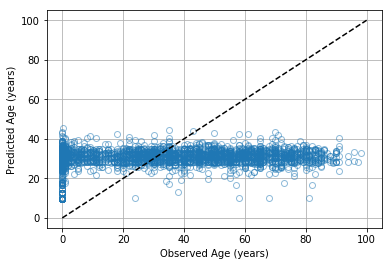

In [65]:
plt.plot(y[test], ypred, 'o', mec='C0', color='none', mew=1, alpha=.5)
plt.plot([0,100], [0,100], 'k--')
plt.xlabel('Observed Age (years)')
plt.ylabel('Predicted Age (years)')
plt.grid();

In [66]:
import seaborn as sns

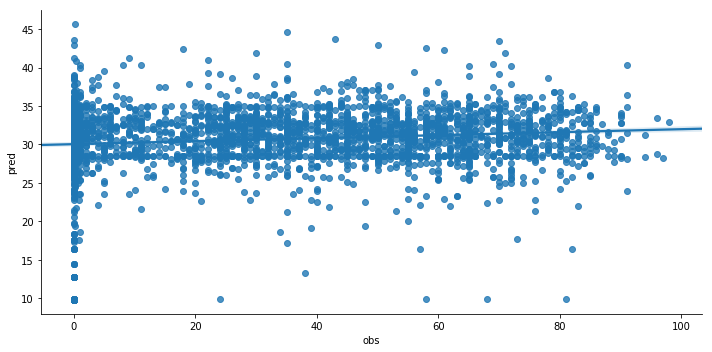

In [67]:
t = pd.DataFrame()
t['obs'] = y[test]
t['pred'] = ypred
sns.lmplot('obs', 'pred', t, aspect=2)